In [72]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("whitegrid")
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [73]:
training = pd.read_csv("train.csv")
testing  = pd.read_csv("test.csv")

In [74]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [76]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [77]:
types_train = training.dtypes
num_values = types_train[(types_train == float)]

print ("Numerical features list:")
print (num_values)

Numerical features list:
Age     float64
Fare    float64
dtype: object


In [78]:
training.describe()  
# Some are missing ages, only numerical features shows statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [79]:
def feature_null_count(data_in, data_in_name = "Input Data"):
    print (data_in_name + " null statistics:")
    print (pd.isnull(data_in).sum())
    print (" ")

In [80]:
feature_null_count(training, "Training")
feature_null_count(testing, "Testing")

Training null statistics:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing null statistics:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
 


In [81]:
training.drop(labels= ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels= ["Cabin", "Ticket"], axis = 1, inplace = True)

In [82]:
feature_null_count(training)
feature_null_count(testing)

Input Data null statistics:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Input Data null statistics:
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64
 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


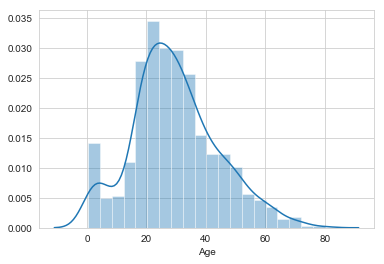

In [83]:
# Investigate age distribution to find replacement of NaN
tmp_training = training.copy()
tmp_training.dropna(inplace = True)

sns.distplot(tmp_training["Age"])
#tmp_training.head()
#tmp_training["Age"].hist(bins = 15)

#sns.distplot(tmp_training["Fare"])

In [84]:
# Filling age na with median might not be the best solution ...
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True)

testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

print( training["Embarked"].value_counts() )
# now replace missing 2 with most common case
training["Embarked"].fillna("S", inplace = True)



S    644
C    168
Q     77
Name: Embarked, dtype: int64


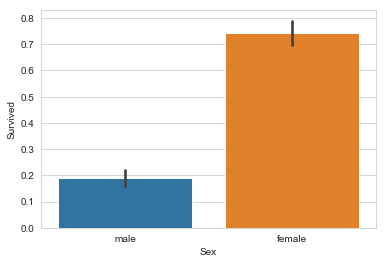

In [85]:
sns.barplot(x = "Sex", y = "Survived", data = training)

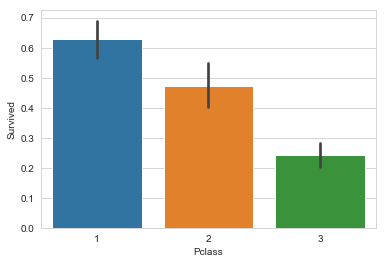

In [86]:
sns.barplot(x = "Pclass", y = "Survived", data = training)
total_survived_P1 = training[training["Pclass"] == 1]["Survived"].sum()
total_survived_P2 = training[training["Pclass"] == 2]["Survived"].sum()
total_survived_P3 = training[training["Pclass"] == 3]["Survived"].sum()
total_survived = total_survived_P1 + total_survived_P2 + total_survived_P3

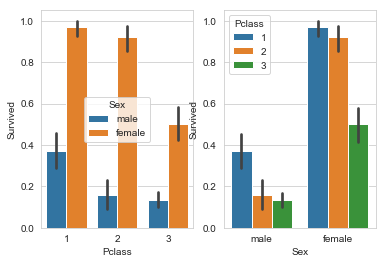

In [87]:
plt.subplot(1,2,1)
sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = training)
plt.subplot(1,2,2)
sns.barplot(x = "Sex", y = "Survived", hue = "Pclass", data = training)

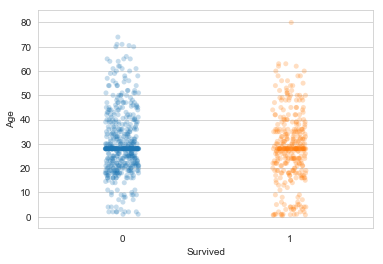

In [88]:
# added mean as NaN is quite obvious
sns.stripplot(x = "Survived", y = "Age", data = training, alpha = 0.25)

In [93]:
#sns.pairplot(training)

In [90]:
# One hot coding of categorical Sex and Embarked features
print( training["Sex"].value_counts() )
print( testing["Sex"].value_counts() )
print( training["Embarked"].value_counts() )
print( testing["Embarked"].value_counts() )

male      577
female    314
Name: Sex, dtype: int64
male      266
female    152
Name: Sex, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64


In [94]:
from sklearn.preprocessing import LabelEncoder

def LabelEncoder_feature(data, *le_vec):
    le_feature = LabelEncoder()
    for le_str in le_vec:
        data[le_str] = le_feature.fit_transform(data[le_str])

LabelEncoder_feature(training, "Sex", "Embarked")
LabelEncoder_feature(testing, "Sex", "Embarked")

print( training["Sex"].value_counts() )
print( testing["Sex"].value_counts() )
print( training["Embarked"].value_counts() )
print( testing["Embarked"].value_counts() )

1    577
0    314
Name: Sex, dtype: int64
1    266
0    152
Name: Sex, dtype: int64
2    646
0    168
1     77
Name: Embarked, dtype: int64
2    270
0    102
1     46
Name: Embarked, dtype: int64
